### Using ONE of the following sources, complete the questions for only that source. 
Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

### 1.Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#first way
dataset = pd.read_csv("../week16repo/australian.csv")
dataset

,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [20]:
import pandas as pd 
dataset = pd.read_csv('../week16repo/Australian.CSV',header=None,names=['C1','N2','N3','C4_enc','C5_enc','C6_enc','N7','C8','C9','N10','C11','C12_enc','N13','N14','Target'])
dataset

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [17]:
#second way
data = np.genfromtxt('../week16repo/australian.dat',
                    skip_header=1,
                     names=True,
                     dtype=None,
                     delimiter=' ')
df=pd.DataFrame(data)

In [18]:
df

,0,2267,7,2,8,4,0165,0_1,0_2,0_3,0_4,2_1,160,1,0_5
0,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
1,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
2,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
3,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
4,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
684,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
685,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
686,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [19]:
#third way
credit_df = pd.read_table("../week16repo/australian.dat",
                         sep=" ",header=None)

In [20]:
credit_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [21]:
#missing values
dataset.isna().mean().to_frame(name='% of missing values') # No missing values

,% of missing values
C1,0.0
N2,0.0
N3,0.0
C4_enc,0.0
C5_enc,0.0
C6_enc,0.0
N7,0.0
C8,0.0
C9,0.0
N10,0.0


In [22]:
#statistical summary of features
dataset.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [23]:

#unique value
dataset.nunique().to_frame("# of unique values")

,# of unique values
C1,2
N2,350
N3,215
C4_enc,3
C5_enc,14
C6_enc,8
N7,132
C8,2
C9,2
N10,23


In [24]:
dataset.corr()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
C1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
N2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
N3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
C4_enc,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
C5_enc,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
C6_enc,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
N7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
C8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
C9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
N10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


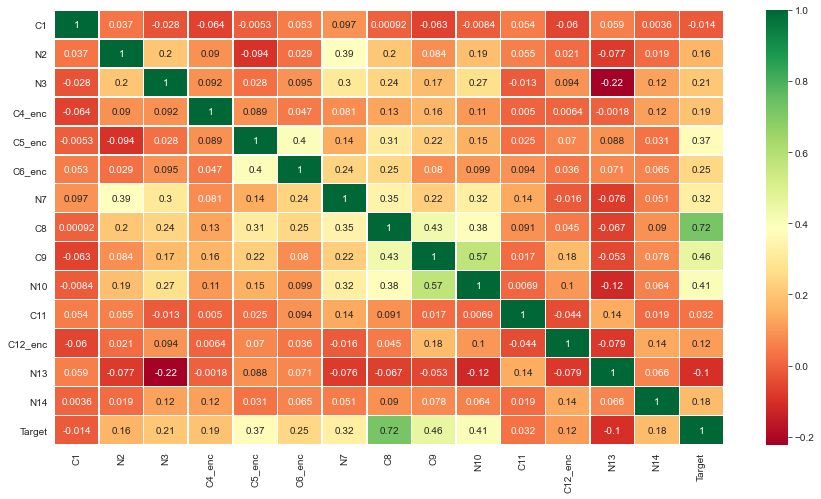

In [43]:
#Correlation Matrix
sns.heatmap(dataset.corr(),linewidths=0.5, annot = True, cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()


C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

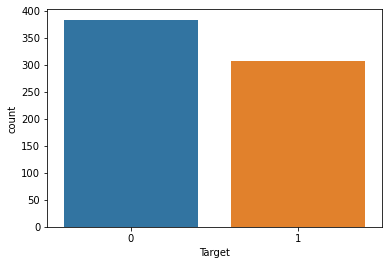

In [26]:
sns.countplot(dataset.Target)

### 2.Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop('Target', axis=1)
y = dataset['Target']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [45]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from pydotplus import graph_from_dot_data
from IPython.display import Image

# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 10,random_state=42)

In [46]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62 15]
 [14 47]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        77
           1       0.76      0.77      0.76        61

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.79      0.79      0.79       138



In [9]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

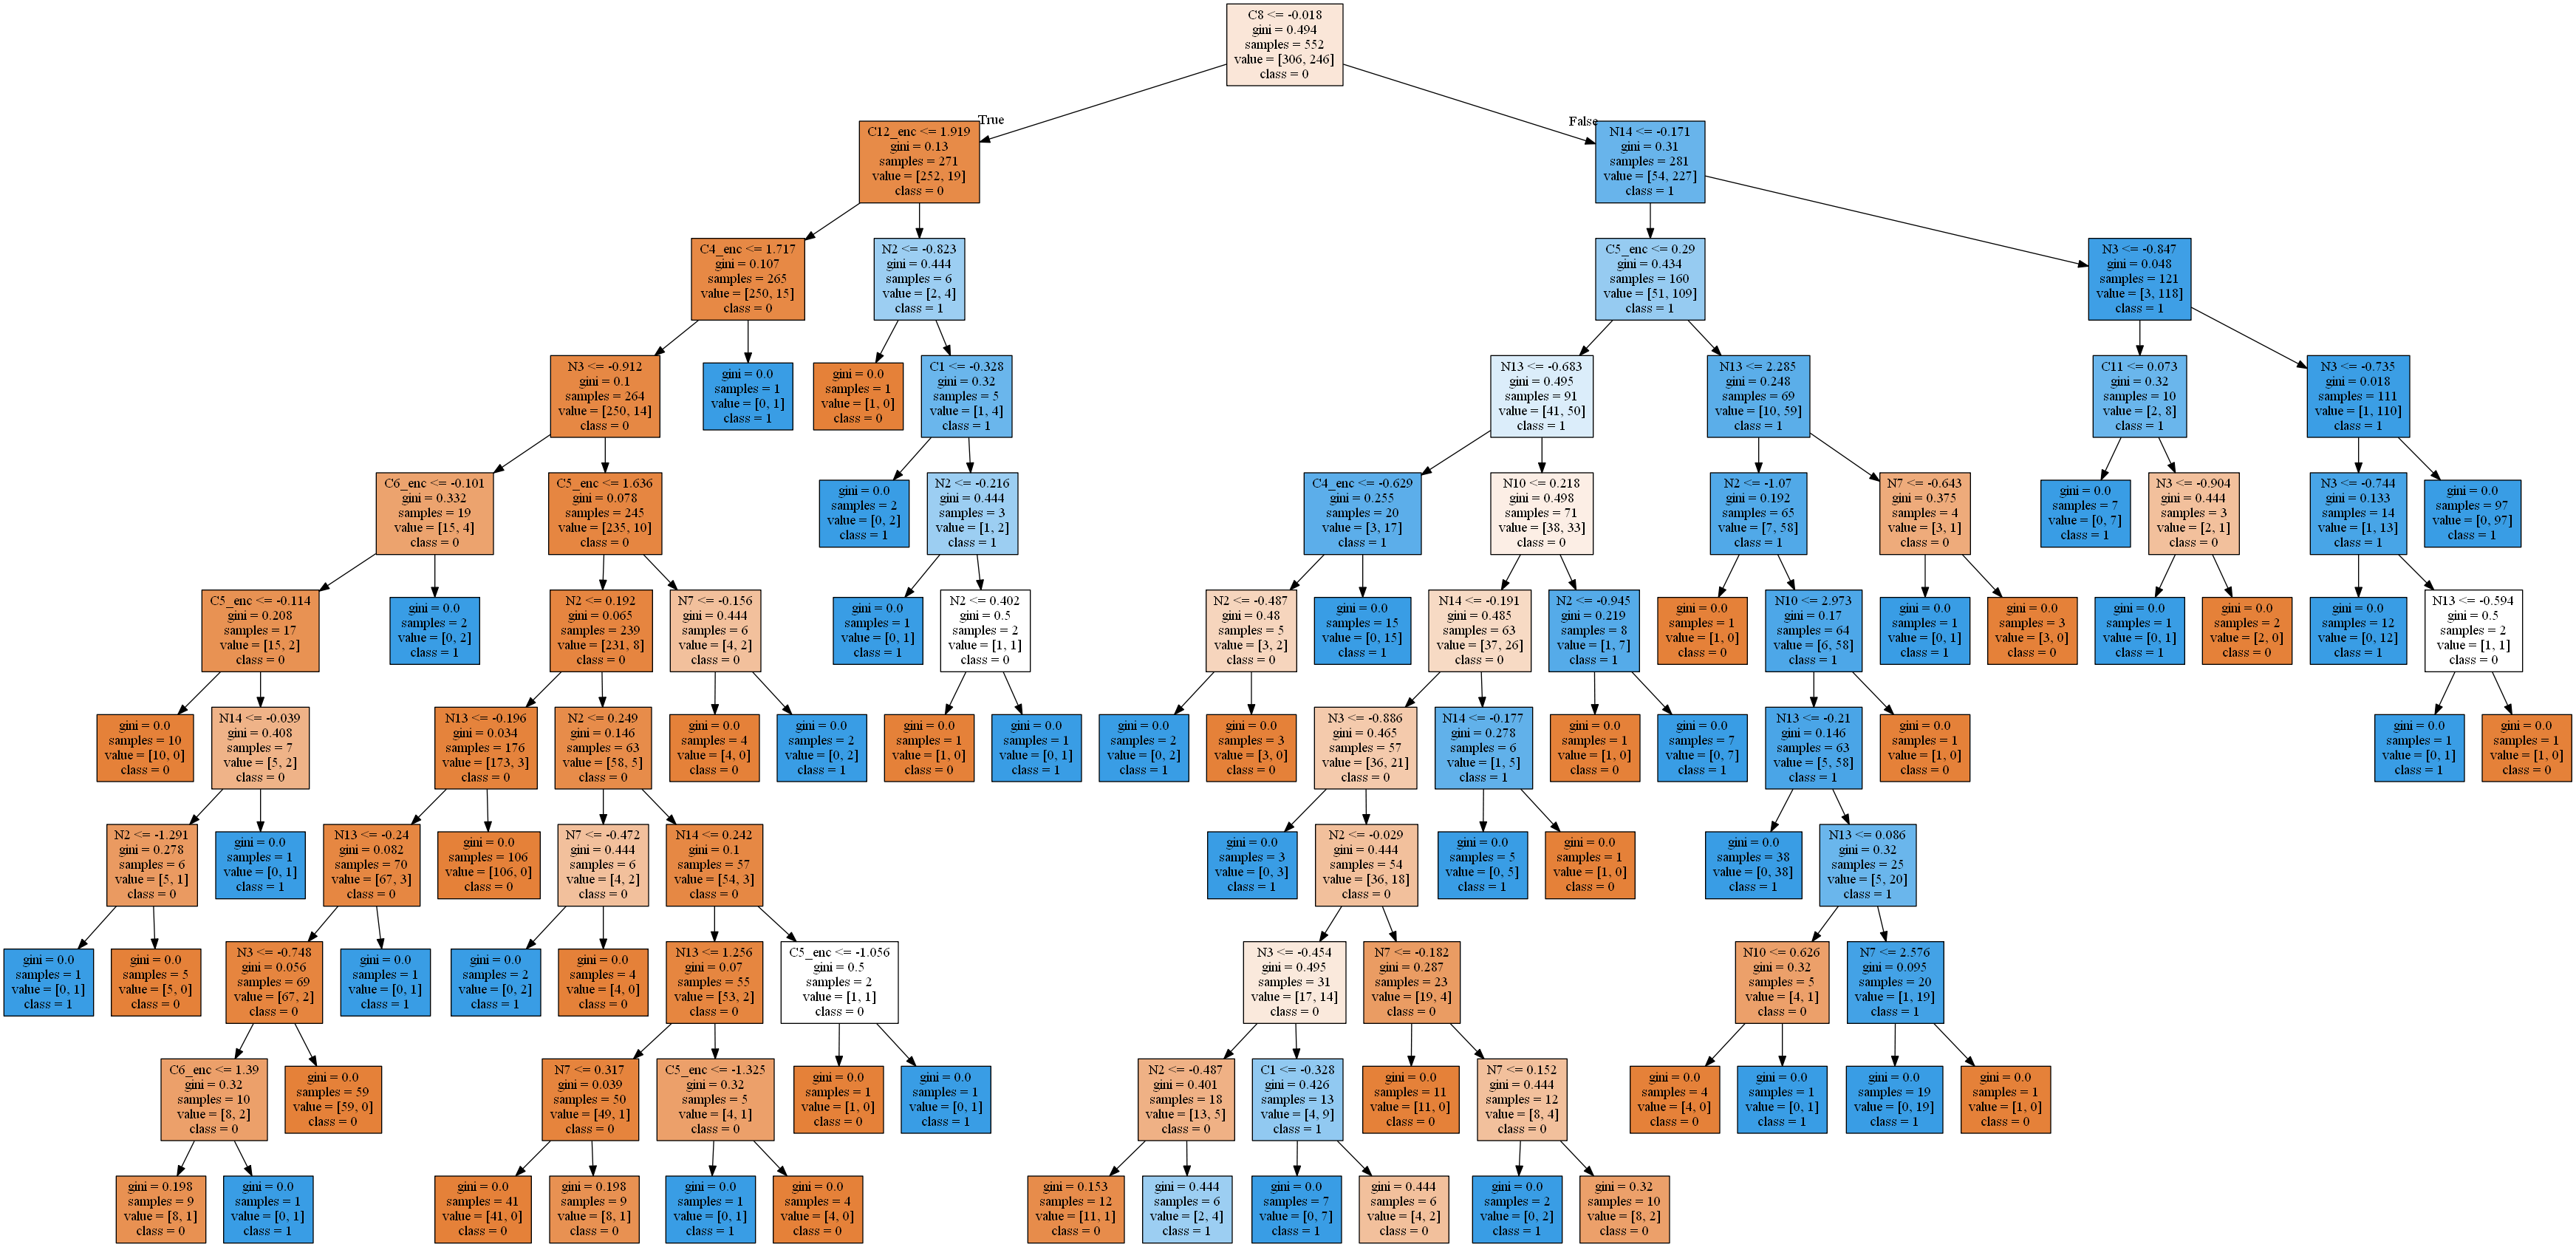

In [10]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 3.Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop('Target', axis=1)
y = dataset['Target']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state =42)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8115942028985508

### 4. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

In [13]:
import sys
print(sys.base_prefix)

C:\Users\sachn\anaconda3


In [14]:
#XGBoost
#sudo pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb 
from xgboost import XGBRegressor

#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\Users\sachn\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        77
           1       0.76      0.95      0.85        61

    accuracy                           0.85       138
   macro avg       0.86      0.86      0.85       138
weighted avg       0.87      0.85      0.85       138



### 5.Which model performed best? What is your performance metric? Why? 

In [38]:
# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
# Splitting dataset into train & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

# Building the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 170, random_state = 0)
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("\nMean of the Accuracies after cross-validation: ", accuracies.mean())
print("\nStandard Deviation within the accuracies: ", accuracies.std())

print('\nAccuracy: ', accuracy)


Mean of the Accuracies after cross-validation:  0.8696753246753246

Standard Deviation within the accuracies:  0.05399755746179734

Accuracy:  0.8840579710144928


Here are the accuracies, mean of the 10-fold cross-validated accuracies and standard deviation of the model when evaluated on the test set.


almost all variables by themselves do not account for the approval decision. This means that the target variable depends on a non-linear combination of all variables. 

#### plot a decision count plot with seaborn. This plot helps to visualize at one glance how many rejections and approvals have been handed.

C:\Users\sachn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


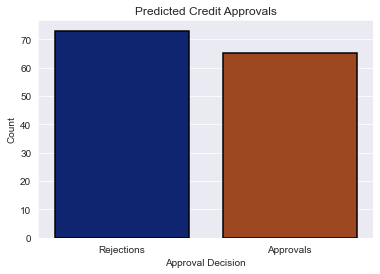

In [40]:
pred = list()
reject_count = approved_count = 0
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        pred.append('Rejections')
    else:
        pred.append('Approvals')
pred = pd.DataFrame(pred)
pred.columns = ['Decisions']
# Visualization of Decision Counts
plt.Figure(figsize = (8, 8))
sb.set_style('darkgrid')
sb.countplot(pred['Decisions'], data = pred, edgecolor = 'black', linewidth=1.5, palette = 'dark')
plt.title('Predicted Credit Approvals')
plt.xlabel('Approval Decision')
plt.ylabel('Count')
plt.show()

In [ ]:
the model’s got a good accuracy of 88%, you can see that the correlations between the variables are highly non-linear.

### Preprocessing the data


The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

In [49]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

Fitting a logistic regression model to the train set

Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

In [50]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [54]:
logreg.score(rescaledX_train, y_train)

0.8731884057971014

### Making predictions and evaluating performance

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. The confusion matrix helps us to view our model's performance from these aspects.

In [51]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print('Confusion matrix: \n ', confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier:  0.8840579710144928
Confusion matrix: 
  [[65  8]
 [ 8 57]]


### Grid searching and making the model perform better

Our model was pretty good! It was able to yield an accuracy score of almost 88%.

We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

scikit-learn's implementation of logistic regression consists of different hyperparameters but we will grid search over the following two:

*tol-tol is the tolerance for the stopping criteria. This tells scikit to stop searching for a minimum (or maximum) once some tolerance is achieved, i.e. once you're close enough.

*max_iter-An iteration is a term used in machine learning and indicates the number of times the algorithm's parameters are updated.

In [52]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

Finding the best performing model

We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

We will instantiate GridSearchCV() with our earlier logreg model with all the data we have. Instead of passing train and test sets separately, we will supply X (scaled version) and y. We will also instruct GridSearchCV() to perform a cross-validation of five folds.

In [53]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.859420 using {'max_iter': 100, 'tol': 0.01}


In [ ]:
so Logistic Regression model perform best in Australian credit Approval dataset. We r getting Accuracy .88% in this.
Dicision tree model accuracy- 0.79%
random Forest model Accuracy- 0.81%
xgboost model Accuracy- 0.85%
using Grid searching Accuracy is 0.85%